# Hotel Storno Data Analysis

This is a dataset of Time-Series Data. More specifically, the dataset contains the dates, on which bookings have been made or cancelled. Some interesting correlations can be found. It is especially interesting, as the datapoints partially reflect the COVID outbreak.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime


#Settings
plt.rcParams['axes.grid'] = True

### Load the Dataset

In [2]:
data = pd.read_csv('./data/cancellation_data.csv'
                   , usecols = ['date', 'cancelledOn', 'createdOn']
                   , parse_dates = ['date', 'cancelledOn', 'createdOn']
                  )

Notizen zur Analyse / Brainstorming:
* Interessant sind sicherlich Datediff / timedelta features zwischen cancelled / created / date
* Scatterplots der unterschiedlichen Daten
* aufeinanderfolgende 'date' values scheinen Nächtigungen zu sein, die alle unter einen Besuch einer Person fallen und somit gänzlich storniert werden
* Kreieren neuer Features: Quarter, Months, Weeks, Days, Day of Week?
* Binning der timedelta variablen = Erstellen kategorischer Variablen für multivariate Analysen

In [3]:
data.head()

,date,cancelledOn,createdOn
0,2018-05-31,2018-05-28,2018-05-22
1,2018-06-01,2018-05-28,2018-05-22
2,2018-06-02,2018-05-28,2018-05-22
3,2018-06-03,2018-05-28,2018-05-22
4,2018-08-10,2018-03-19,2018-02-21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3770 non-null   datetime64[ns]
 1   cancelledOn  3770 non-null   datetime64[ns]
 2   createdOn    3770 non-null   datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 88.5 KB


### Create new Features

In [5]:
#Timedelta features

#How many days before the stay was it cancelled?
data['td_date_cancelled'] = data['date'] - data['cancelledOn']
data['td_date_cancelled'] = data['td_date_cancelled'].dt.days #convert to int for visualization

#How many days before the stay has it been booked?
data['td_date_created'] = data['date'] - data['createdOn']
data['td_date_created'] = data['td_date_created'].dt.days

#How many days passed between booking the stay and then cancelling it?
data['td_cancelled_created'] = data['cancelledOn'] - data['createdOn']
data['td_cancelled_created'] = data['td_cancelled_created'].dt.days

In [6]:
data.head()

,date,cancelledOn,createdOn,td_date_cancelled,td_date_created,td_cancelled_created
0,2018-05-31,2018-05-28,2018-05-22,3,9,6
1,2018-06-01,2018-05-28,2018-05-22,4,10,6
2,2018-06-02,2018-05-28,2018-05-22,5,11,6
3,2018-06-03,2018-05-28,2018-05-22,6,12,6
4,2018-08-10,2018-03-19,2018-02-21,144,170,26


In [7]:
#Kaum Buchungen mit Stornos für 2018 enthalten
data['date'].dt.year.value_counts()

2020    2240
2019    1517
2018      13
Name: date, dtype: int64

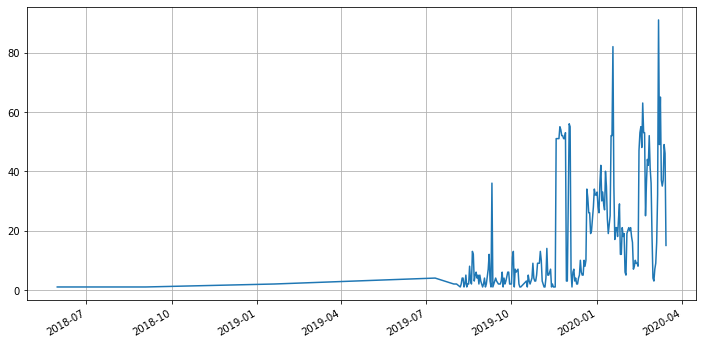

In [8]:
#Verteilung der stornierten Urlaube
plt.figure(figsize = (12, 6))
data['date'].value_counts().plot()

In [9]:
#Die meisten Buchungen mit Stornos sind fürs erste und letzte Quartal (Neujahr, Winter)
data['date_q'] = data['date'].dt.quarter
data['date'].dt.quarter.value_counts(normalize = True)

1    0.594695
4    0.341379
3    0.062865
2    0.001061
Name: date, dtype: float64

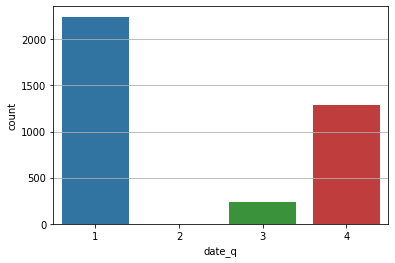

In [10]:
sns.countplot(data['date_q'], data = data)

In [11]:
#Granularere Ergebnisse für die Quartalsanalyse
data['date'].dt.month.value_counts(normalize = True)

1     0.236074
2     0.227321
11    0.173210
12    0.135544
3     0.131300
10    0.032626
9     0.032095
8     0.029178
7     0.001592
6     0.000796
5     0.000265
Name: date, dtype: float64

In [33]:
#2 = Mittwoch, 3 = Donnerstag, 0 = Montag
#Die meisten Buchungen die dann storniert werden, werden unter der Woche gemacht
data['cancelledOn'].dt.weekday.value_counts(normalize = True)

1    0.236870
6    0.181698
0    0.137401
3    0.136870
4    0.125199
5    0.097613
2    0.084350
Name: cancelledOn, dtype: float64

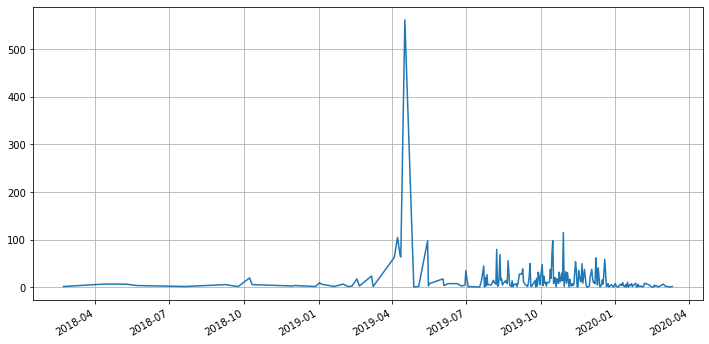

In [13]:
#Verteilung der Buchungsdaten der stornierten Urlaube
plt.figure(figsize = (12, 6))
data['createdOn'].value_counts().plot()

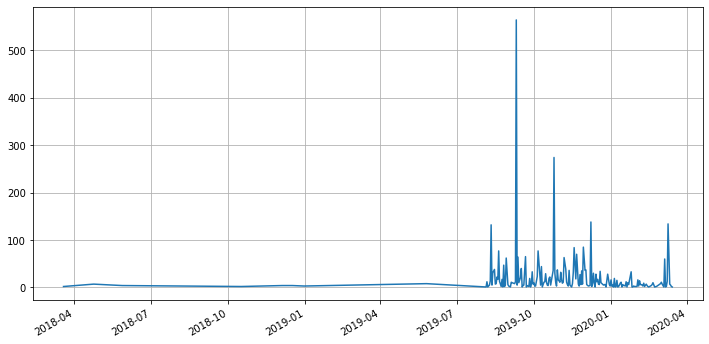

In [14]:
#Verteilung der Stornodaten
plt.figure(figsize = (12, 6))
data['cancelledOn'].value_counts().plot()

In [35]:
#Wieviele Tage vor dem Urlaub wird storniert?
data['td_date_cancelled'].value_counts(normalize = True).head()

5     0.033156
4     0.032626
2     0.032095
3     0.030504
38    0.024403
Name: td_date_cancelled, dtype: float64

### Scatterplots date, cancelledOn, createdOn

(736785.0, 737516.0)

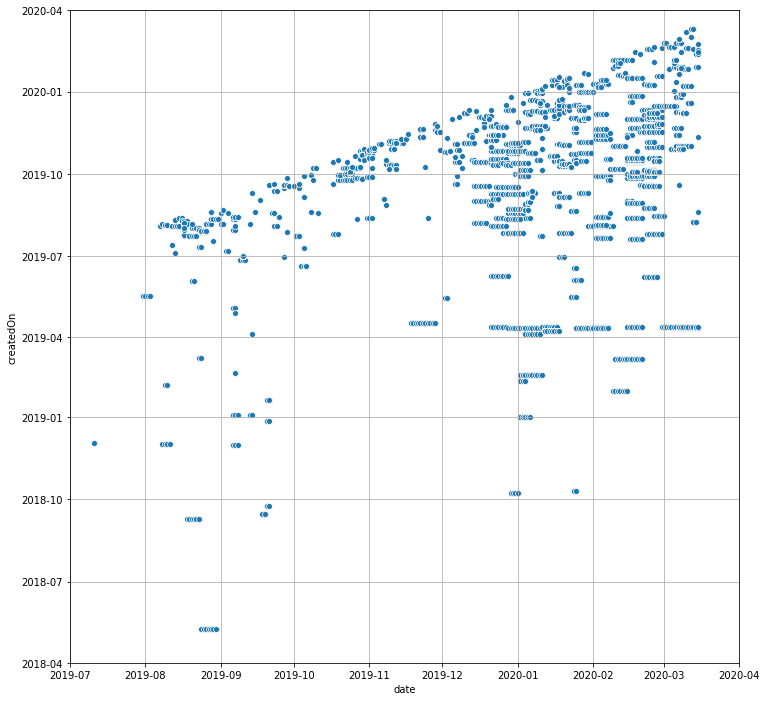

In [36]:
#Scatter Buchung - Urlaub
plt.figure(figsize = (12, 12))
sns.scatterplot(x = 'date', y = 'createdOn', data = data)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 4, 1)))
plt.ylim((datetime.date(2018, 4, 1),datetime.date(2020, 4, 1)))

Linearer Zusammenhang zeigt wie knapp Urlaube im voraus gebucht werden.
Werte streuen stark nach unten, Urlaube werden also auch weiter im Voraus gebucht.
Eng anliegende Datenpunkte in 'einer Reihe' stellen gesamte Urlaube dar - bzw. mehrere gebuchte Nächte.

(737241.0, 737516.0)

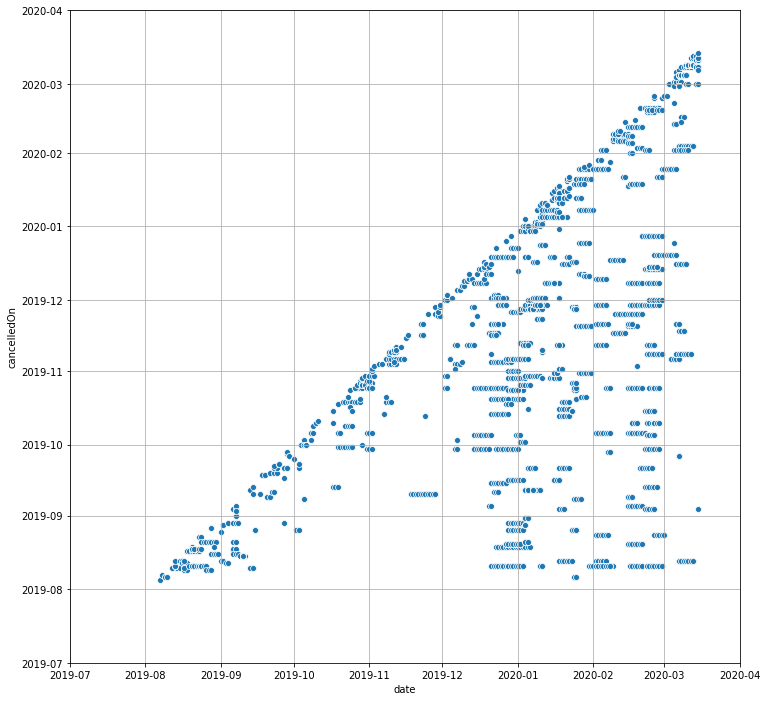

In [37]:
#Scatter Urlaub - Stornierung
plt.figure(figsize = (12, 12))
sns.scatterplot(x = 'date', y = 'cancelledOn', data = data)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 4, 1)))
plt.ylim((datetime.date(2019, 7, 1),datetime.date(2020, 4, 1)))

Starker linearer Zusammenhang, Stornos werden sehr oft wenige Tage vor dem Urlaub durchgeführt (Krankheit, ...).  
Urlaube ab Dezember 2019 / Jänner 2020 wurden teilweise bis zu 3-4 Monate vorher storniert. Es scheint so, als würde dies vor allem längere Urlaube / mehrere Nächtigungen betreffen.

(737029.0, 737456.0)

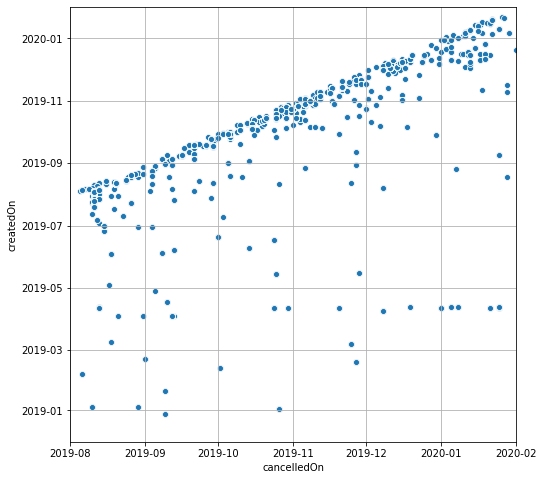

In [18]:
#Scatter Buchung - Stornierung
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'cancelledOn', y = 'createdOn', data = data)
plt.xlim((datetime.date(2019, 8, 1),datetime.date(2020, 2, 1)))
plt.ylim((datetime.date(2018, 12, 1),datetime.date(2020, 2, 1)))

Starker linearer Zusammenhang. Buchungen werden relativ alsbaldig storniert wenn notwendig.  
Interessant wäre hier eine Farbcodierung, wie weit der Urlaub im Voraus gebucht wird (kategorisch). Ich gehe davon aus, dass die nach unten streuenden Werte (später storniert) auch eher im Voraus gebucht wurden.

### Urlaub im Jahr 2019 - Scatterplots date, cancelledOn, createdOn

Um vor allem einen Blick auf Buchungen nicht aus dem Jahr 2020 zu werfen (Corona), und 2018 kaum Datenpunkte enthält, entschied ich mich für eine Analyse für Buchungen im Jahr 2019.

In [19]:
data_19 = data.loc[data['date'].dt.year == 2019,]

(736938.0, 737456.0)

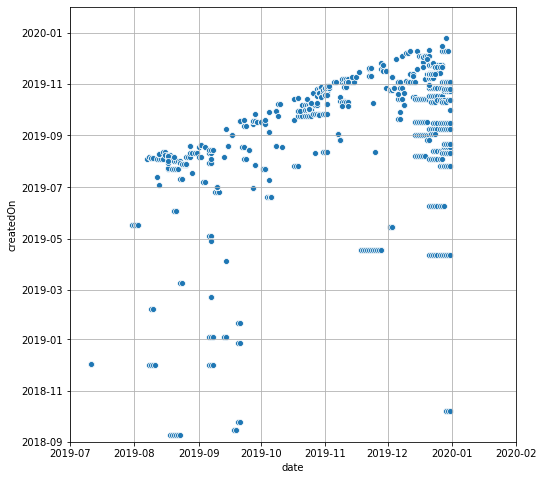

In [20]:
#Scatter Buchung - Urlaub
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'date', y = 'createdOn', data = data_19)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 2, 1)))
plt.ylim((datetime.date(2018, 9, 1),datetime.date(2020, 2, 1)))

Für klassische Sommerurlaube wird bereits schon bis zu einem Jahr im voraus gebucht, teilweise auch längere Zeiträume. Auch Winterurlaube werden besonders lange und bis zu einem halben Jahr im voraus gebucht.

(736999.0, 737456.0)

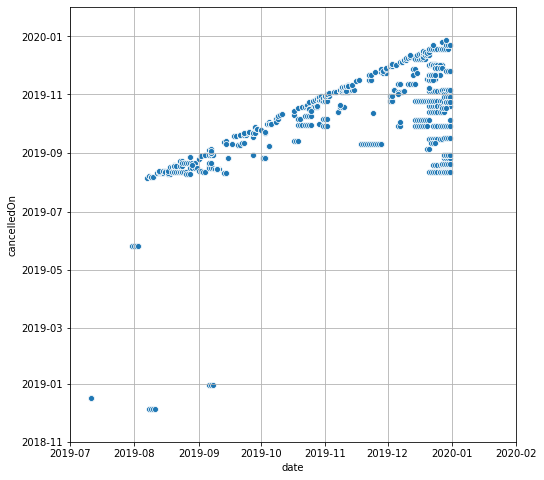

In [39]:
#Scatter Urlaub - Stornierung
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'date', y = 'cancelledOn', data = data_19)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 2, 1)))
plt.ylim((datetime.date(2018, 11, 1),datetime.date(2020, 2, 1)))

Stark linearer Zusammenhang zwischen Zeitpunkt des Urlaubs und Zeitpunkt der Stornierung - wirklich meist kurz davor.  
Im Dezember sieht man vor allem, dass bereits schon deutlich früher storniert wird - teilweise im August schon. Zudem sieht man besonders Ende Dezember lange Urlaube. Diese reichen teilweise wahrscheinlich bis ins neue Jahr, hier abgeschnitten.

(736938.0, 737425.0)

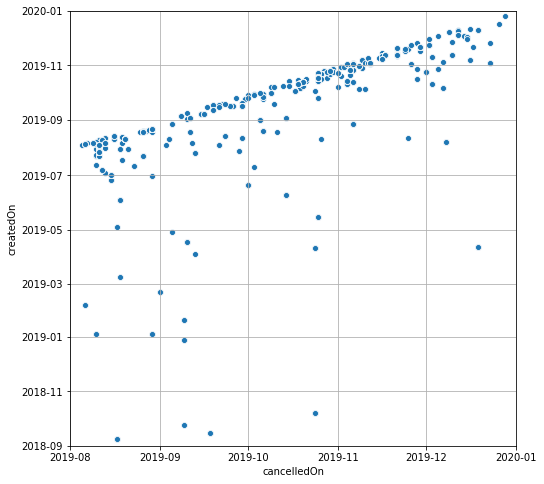

In [22]:
#Scatter Buchung - Stornierung
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'cancelledOn', y = 'createdOn', data = data_19)
plt.xlim((datetime.date(2019, 8, 1),datetime.date(2020, 1, 1)))
plt.ylim((datetime.date(2018, 9, 1),datetime.date(2020, 1, 1)))

Stark linearer Zusammenhang zwischen Buchung und Stornierung. Storniert wird meist kurz nach Buchung, was wahrscheinlich auch kurz vor dem Urlaub ist. Streut aber auch bis hin zu Stornierungen 1-2 Monate nach der Buchung - besonders dann wenn Urlaube weit im voraus gebucht werden? Könnte mit Farbkodierung geprüft werden

### Timedelta Analysen

In [23]:
#Übersicht der TD Mediane auf Monatsebene
data.groupby(by = [data['date'].dt.year, data['date'].dt.month]).median()

td_date_cancelled  td_date_created  td_cancelled_created  date_q
date date                                                                  
2018 5                   3.0              9.0                   6.0     2.0
     6                   5.0             11.0                   6.0     2.0
     8                 128.5            141.5                  13.0     3.0
     9                 131.0            144.0                  13.0     3.0
2019 1                  94.0            182.0                  88.0     1.0
     7                 206.0            220.0                  14.0     3.0
     8                   5.0             29.0                  13.0     3.0
     9                  19.5             71.0                  45.0     3.0
     10                  6.0             23.0                  12.0     4.0
     11                 73.0            219.0                 146.0     4.0
     12                 39.0            103.0                   9.0     4.0
2020 1                  59.0            119.5                  17.0     1.0
     2                 116.0            128.0                   9.0     1.0
     3                   7.0            129.0                  42.0     1.0

In [24]:
cols = ['td_date_cancelled', 'td_date_created', 'td_cancelled_created']

<Figure size 576x288 with 0 Axes>

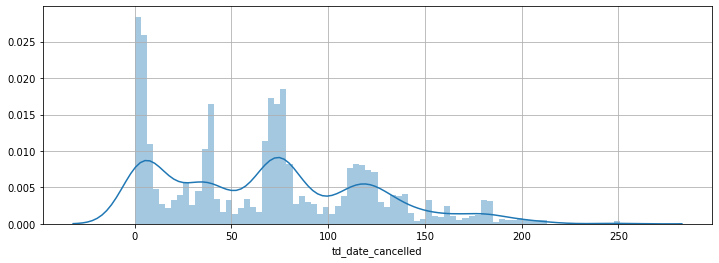

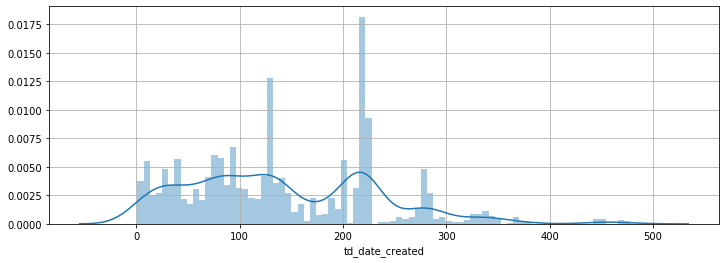

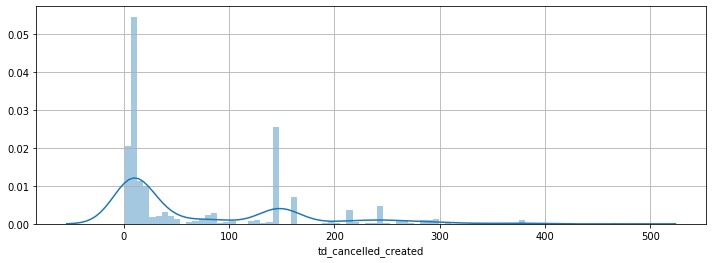

In [25]:
#Verteilungen der Timedeltas
plt.figure(figsize = (8,4))
for col in cols:
    plt.figure(figsize = (12,4))
    sns.distplot(data[col], bins = 80, kde = True)
    plt.show()

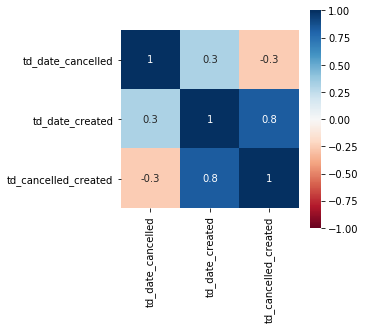

In [26]:
#Correlation
plt.figure(figsize = (4, 4))
sns.heatmap(data[cols].corr()
           , annot = True
           , fmt = '.1g'
           , vmin = -1
           , vmax = 1
           , cmap = 'RdBu'
           , square = True)

plt.show()

Der Zeitraum zwischen Urlaub und Buchung korreliert stark mit dem Zeitraum zwischen Buchung und Stornierung. Macht Sinn - je knapper ich buche, desto knapper muss / kann ich auch stornieren.

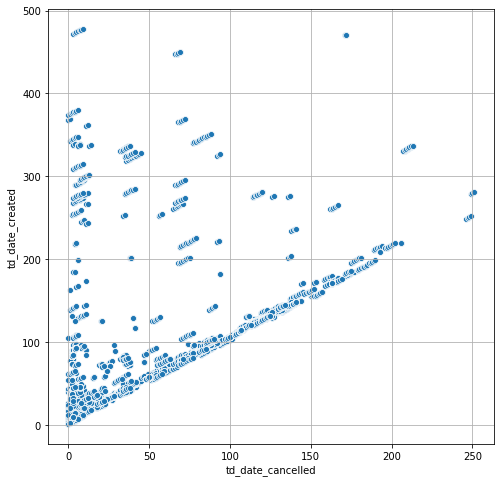

In [32]:
#Scatter
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'td_date_cancelled', y = 'td_date_created', data = data)

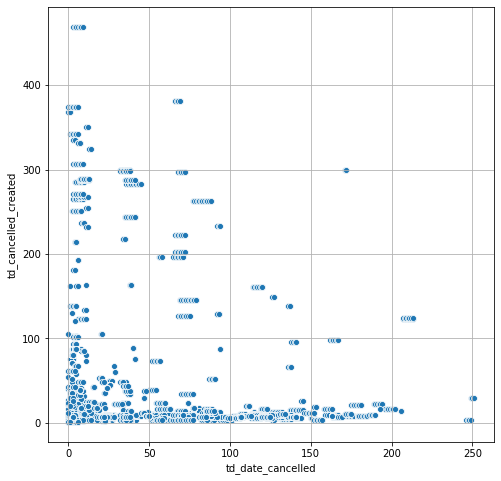

In [28]:
#Scatter
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'td_date_cancelled', y = 'td_cancelled_created', data = data)

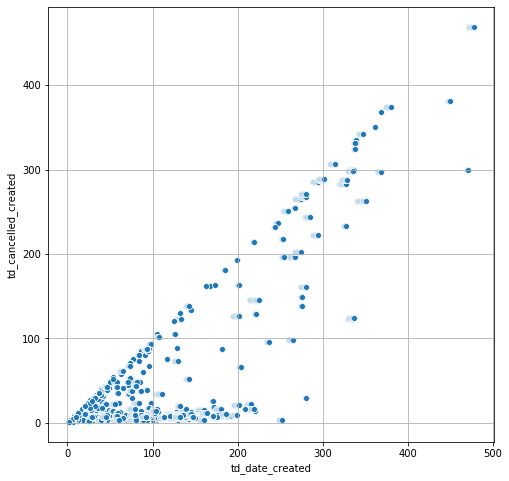

In [29]:
#Scatter
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'td_date_created', y = 'td_cancelled_created',  data = data)

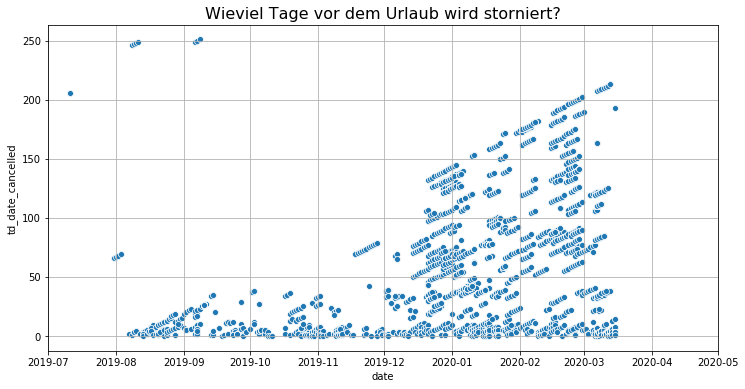

In [30]:
#Scatter
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'date', y = 'td_date_cancelled',  data = data)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 5, 1)))
plt.title('Wieviel Tage vor dem Urlaub wird storniert?', fontsize = 16);

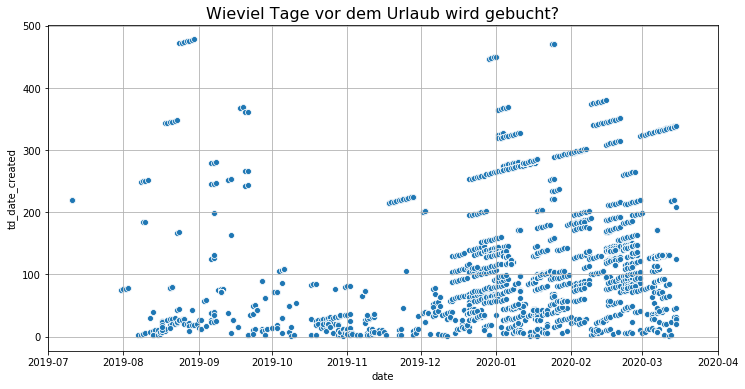

In [31]:
#Scatter
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'date', y = 'td_date_created',  data = data)
plt.xlim((datetime.date(2019, 7, 1),datetime.date(2020, 4, 1)))
plt.title('Wieviel Tage vor dem Urlaub wird gebucht?', fontsize = 16);